# Dataset Presentation of CB6133_filtered

In [1]:
import numpy as np

# Load training data from cb6133
training_data = np.load('cb6133filtered.npy')
print('sequences:',training_data.shape[0],
      '\nfeatures:' ,training_data.shape[1])

sequences: 5534 
features: 39900


In [2]:
# Compute label counts
str_counter = np.array([0., 0., 0., 0., 0., 0., 0., 0., 0.])
for i in range(training_data.shape[0]):
    sequence = training_data[i,:].reshape((700,57))
    structs = sequence[:, 22:31]
    sumstructs = np.sum(structs, axis = 0)
    str_counter +=  sumstructs
    

<BarContainer object of 9 artists>

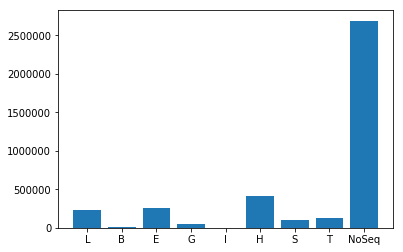

In [4]:
import matplotlib.pyplot as plt
plt.bar(['L', 'B', 'E', 'G', 'I', 'H', 'S', 'T','NoSeq'],str_counter)

<BarContainer object of 8 artists>

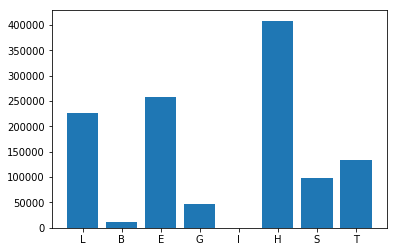

In [5]:
# plot once again without NoSeq
plt.bar(['L', 'B', 'E', 'G', 'I', 'H', 'S', 'T'],str_counter[:-1])

In [6]:
# Compute label count, grouped, BGI (small) vs LEHST (big)
count_imbalance = []
for i in range(training_data.shape[0]):
    sequence = training_data[i,:].reshape((700,57))
    structs = sequence[:, 22:31]
    sumstructs = np.sum(structs, axis = 0)
    count_imbalance.append([sumstructs[0]+sumstructs[2]+sumstructs[5]+sumstructs[6]+sumstructs[7],\
                            sumstructs[1]+sumstructs[3]+sumstructs[4]])

In [7]:
# compute percentage of small/all
perc_small = [x[1]/sum(x) for x in count_imbalance]
print(sum([x[1] for x in count_imbalance])/(sum([x[0] for x in count_imbalance])+sum([x[1] for x in count_imbalance])))


0.049575008577575935


(array([1.192e+03, 1.315e+03, 1.341e+03, 9.190e+02, 4.660e+02, 1.650e+02,
        7.900e+01, 2.900e+01, 1.600e+01, 3.000e+00, 5.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 ]),
 <a list of 20 Patch objects>)

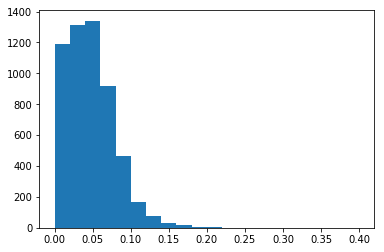

In [8]:
# checking histogram to select a threshold
plt.hist(perc_small,bins = 20)

In [9]:
# checking threshold in numbers
len([x for x in perc_small if x>0.13])

92

0.059134407545124695


(array([4768., 5260., 5364., 3676., 1864.,  660., 2045., 1131.,  624.,
         117.,  195.,   39.,   39.,   39.,    0.,    0.,    0.,    0.,
           0.,   39.]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 ]),
 <a list of 20 Patch objects>)

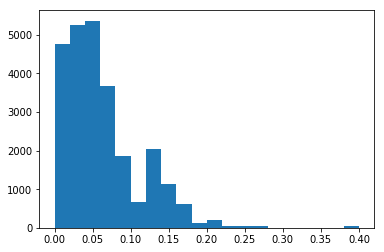

In [12]:
# upsample (indices) training samples where small percentage is above threshold
augmented = []
for x,i in zip(perc_small,list(range(training_data.shape[0]))):
    if x>0.13:
        augmented+=[i]*13
    else:
        augmented.append(i)

# Compute label counts
str_counter = np.array([0., 0., 0., 0., 0., 0., 0., 0., 0.])
for i in augmented:
    sequence = training_data[i,:].reshape((700,57))
    structs = sequence[:, 22:31]
    sumstructs = np.sum(structs, axis = 0)
    str_counter +=  sumstructs

for i in augmented:
    sequence = training_data[i,:].reshape((700,57))
    structs = sequence[:, 22:31]
    sumstructs = np.sum(structs, axis = 0)
    count_imbalance.append([sumstructs[0]+sumstructs[2]+sumstructs[5]+sumstructs[6]+sumstructs[7],\
                            sumstructs[1]+sumstructs[3]+sumstructs[4]])
    
perc_small = [x[1]/sum(x) for x in count_imbalance]

print(sum([x[1] for x in count_imbalance])/(sum([x[0] for x in count_imbalance])+sum([x[1] for x in count_imbalance])))

plt.hist(perc_small,bins = 20)

<BarContainer object of 8 artists>

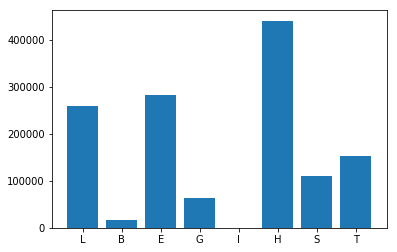

In [13]:
# plot once again without NoSeq
plt.bar(['L', 'B', 'E', 'G', 'I', 'H', 'S', 'T'],str_counter[:-1])

In [14]:
# just 0.1 ... (how to optimize it)

In [15]:
new_dataset = np.vstack([training_data[i,:] for i in augmented])

In [16]:
new_dataset.shape

(6638, 39900)

In [18]:
np.save('cb6133filtered_aug.npy',new_dataset)